http://hplgit.github.io/num-methods-for-PDEs/doc/pub/wave/html/slides_wave-solarized.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
xmin = -2*np.pi
xmax = 2*np.pi
dx = 0.01
T = 1
dt = 0.01

nx = int((xmax-xmin)/dx)
nt = int(T/dt)

In [3]:
C = 1 # wave velocity

c = C * (dt/dx) # courant number
def init_fn(x):
    return np.sin(x)

x = lambda a: xmin + a * dx

def init_profile(u, f):
    for a in range(1, nx-1): # except boundary, which is always 0
        u[a, 0] = f(x(a))
        u[a, 1] = u[a, 0]
    
    # u_t = 0. Zero initial velocity. Doesn't work somehow ..
    #for a in range(1, nx-1):
    #    space_lap = u[a+1, 0] - 2 * u[a, 0] + u[a-1, 0]
    #    u[a, 1] = u[a, 0] + (1/2)*c*c * space_lap 
    return u

In [4]:
def wave_eqn(u):
    # wave eqn. Finite difference
    for t in range(2, nt):
        for a in range(1, nx-1): 
            time_lap = 2 * u[a, t-1] - u[a, t-2]
            space_lap = c*c*(u[a+1, t-1] - 2 * u[a, t-1]
                            + u[a-1, t-1])
            u[a, t] = time_lap + space_lap
    return u

In [5]:
u = np.zeros((nx, nt)) # space, time
u.shape

(1256, 100)

In [20]:
u = init_profile(u, init_fn)
u = wave_eqn(u)

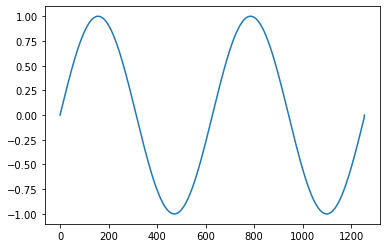

In [21]:
# initial
plt.plot(u[:, 0])

In [22]:
# traveling waves
u1 = np.zeros((nx, nt)) # space, time
u1[:, 0] = u[:, 0]

u2 = np.zeros((nx, nt)) # space, time
u2[:, 0] = u[:, 0]

def traveling_wave(u, sign):
    for t in range(1,nt):
        for a in range(1,nx-1):
            u[a, t] =  init_fn(x(a) + sign * c * t * dt)
    return u

u1 = traveling_wave(u1, 1)
u2 = traveling_wave(u2, -1)
u3 = (1/2) * u1 + (1/2) * u2 # d Alembert's formula

In [97]:

colors =[
    'b',
    'xkcd:coral',
    'xkcd:azure',
    'chartreuse',
    'y',
    'xkcd:green'
    'xkcd:teal',
    'xkcd:lavender'
]
def animate(us, name, nx):
    xs = xmin + dx * np.array(range(0, nx))
    fig = plt.figure()
    plts = []             # get ready to populate this list the Line artists to be plotted
    for i in range(nt):
        ps = []
        # each u is a graph
        for j, u in enumerate(us):
            p, = plt.plot(xs, u[:, i], color=colors[j],
                          linestyle='dashed', alpha=0.8)
            ps.append(p)
        plts.append(ps)
    
    ani = animation.ArtistAnimation(fig, plts, interval=100, 
                                    repeat_delay=3000, blit=True)   # run the animation
    ani.save(name + '.mp4')    # optionally save it to a file
    return ani

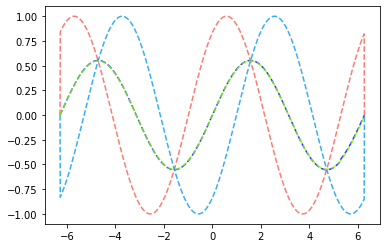

In [43]:
us = [u, u1, u2, u3]
ani = animate(us, 'wave', nx)

In [44]:
HTML(ani.to_html5_video())

## Plucked String
Modify the plucked string non $C^2$ function into a smooth function approximation and involve it with wave eqn

In [14]:
h = 1
p = 1.2

xmin = 0
xmax = np.pi
nx = int((xmax-xmin)/dx)


C = 2 # wave velocity

c = C * (dt/dx) # courant number
dt = 0.01
T = 15


partial_num = 10 # number of terms in the expansion

ms = np.array(range(1, partial_num))
# fourier coefficient of f(x) initial
Am = lambda m: (2 * h * np.sin(m * p))/( m * m * p * (np.pi - p))

u_ps = np.zeros((nx, nt))
u_ps1 = np.zeros((nx, nt))
u_ps2 = np.zeros((nx, nt))

Ams = Am(ms)


# non-C^2 fn
def f_plucked(x, cont=True):
    eps = 0.01
    if not cont and abs(x-p) < eps:
        return h + 0.1 # not continuous
    if x < p:
        return (x * h)/p
    else:
        return   (h * (np.pi - x))/(np.pi - p)
    
    
def plucked(x):
    return np.sum(Ams * np.sin(ms * x))
    
for a in range(nx):
    u_ps[a, 0] = plucked(x(a))
    
u_ps1[:, 0] = u_ps[:, 0]
u_ps2[:, 0] = u_ps[:, 0]


u = np.zeros((nx, nt))
for a in range(nx):
    u[a, 0] = f_plucked(x(a), False)

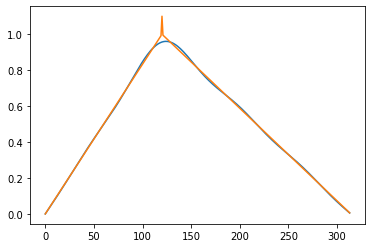

In [15]:
# approximate plucked string
plt.plot(u_ps[:, 0])
plt.plot(u[:, 0])

In [139]:
u_ps = wave_eqn(u_ps)


def traveling_wave(u, sign):
    for t in range(1,nt):
        for a in range(1,nx-1):
            u[a, t] =  plucked(x(a) + sign * c * t * dt)
    return u

u_ps1 = traveling_wave(u_ps1, 1)
u_ps2 = traveling_wave(u_ps2, -1)
u_ps3 = (1/2) * u_ps1 + (1/2) * u_ps2 # d Alembert's formula

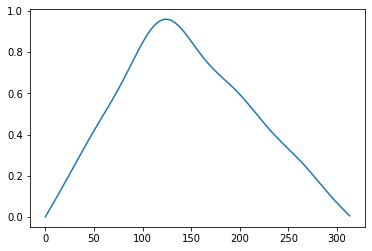

In [140]:
plt.plot(u_ps1[:, 0])
plt.plot(u[:, 0])

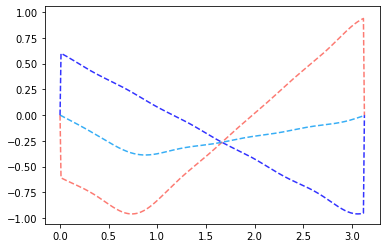

In [141]:
ani = animate([u_ps1, u_ps2, u_ps3], 'smooth_plucked_string', nx)

For comparison
https://www.falstad.com/loadedstring/